# Thema (C)NN werkcollege 2
### Objectherkenning met een Convolutionair neuraal netwerk

Tijdens het vorige college hebben we geprobeerd om met een neuraal netwerk plaatjes in uit de CIFAR-10 dataset te herkennen. We liepen er tegenaan dat we hier in tegenstelling tot het herkennen van handschreven cijfers zoals in het matriaal op de elo maar beperkt succesvol in waren. Een groot verschil tussen beide datasets is dat de CIFAR-10 afbeeldingen veelal ook andere informatie bevatten (zoals een trailer achter een paard) dan alleen het object zelf. 

Een mogelijke oplossing hiervoor is het bouwen van een Convolutionair Neuraal Netwerk (CNN) en eventueel nog wat extra truukjes toe te passen die in de kennis basis benoemd zijn. 


## Business understanding
In dit geval hebben we geen heel expliciete vraag uit de business maar in diverse disciplines is het van belang om verschillende vaak context specifieke objecten te kunnen herkennen. Denk bijv aan een autonoom rijdende auto die een fiets van een motor moet kunnen onderscheiden om de snelheid goed te kunnen inschatten

## Data understanding
We beginnen met het importeren van Keras en de dataset:

In [1]:
#import data (code gegeven)
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

print(train_images.shape)
print(train_labels.shape)

(50000, 32, 32, 3)
(50000, 1)


Als alles goed is gegaan kunnen we zien dat train-images betaat uit 50.000 images van 32 x 32 pixels met 3 kleurkanalen. Voor de zekerheid controleren we alles nog even door de 1e 25 images weer te geven met pyplot en hier het juiste label in tekst onder te zetten. 

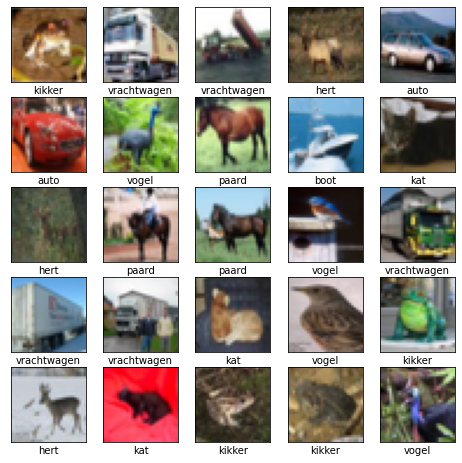

In [2]:
#toon de 1e 25 plaatjes met bijbehorende label (copy paste vorige les)
import matplotlib.pyplot as plt

class_names = ['vliegtuig', 'auto', 'vogel', 'kat', 'hert',
               'hond', 'kikker', 'paard', 'boot', 'vrachtwagen']

plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)  #vul het i-e image
    plt.xticks([]) #geen schaal bij x-as
    plt.yticks([]) #geen schaal bij y-as
    plt.imshow(train_images[i]) 
    plt.xlabel(class_names[train_labels[i][0]]) 
plt.show()

## Data preparation
De volgende stap is weer de data preparation. Een belangrijk verschile met vorige keer is dat een conv2d layer geen vector als input vraagt maar een 3d tensor. 

In [ ]:
#Normaliseer de data en reshape indien nodig de data het juiste formaat (2 min)


Als het goed is hebben we nu 50.000 en 10.000 tensors van 32x32x3. 

## Modelling
We gaan nu beginnen met het bouwen van ons 1e CNN. Laten we net als het vorige 
college eens beginnen met 2 hidden layers. In dit geval conv2d layers met 32 kernels van 3 bij 3,
welke steeds worden opgevolgt door een MaxPooling2D layer (kernel 2,2). Reduceer de output 
tot een vector en eindig met een Dense layer. 

In [ ]:
# definieer het model, compile het, fit, plot de accuracy en validated accuracy,
# en geef weer de 1e 25 plaatjes en hun predected values. (inclusief rekentijd 20 min)

# model


Compile het model met de juiste optimizer, loss-functie en metrics

In [ ]:
#compile (copy paste vorige les.)


Fit het model met de juiste datasets. Train 25 epochs. Onthoudt de resultaten in een variabele (bijv history)

NB: Als je geen laptop met een nVidia kaart hebt, beperk je dan tot 10 epochs.

In [ ]:
#fit model (copy paste)


## Evaluation

In [ ]:
#plot de accuracy en validated accuracy (copy paste vorige keer)
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs=range(1, len(acc)+1)                        
plt.plot(epochs, acc, label='accuracy')
plt.plot(epochs, val_acc, label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
#print de 1e 25 plaatjes uit test_images en daarbij de voorspelde waarde. (copy paste)
predict = model.predict(test_images[0:25]) #gegeven regel. Tip naar de output

plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)  #vul het i-e image
    plt.xticks([]) #geen schaal bij x-as
    plt.yticks([]) #geen schaal bij y-as
    plt.imshow(test_images[i]) 
    plt.xlabel(class_names[predict[i].argmax()]) 
    #predict geeft per image een array terug met kans per label. We willen de hoogste hebben daarom de argmax()
plt.show()

Zoals je ziet hebben we flink wat extra rekentijd nodig voor ons netwerk, maar het resultaat lijkt er ook wel op. We hebben een stuk hogere val_accuracy weten te behalen. Eventueel zouden we nog wat extra Conv2d layers of Dense layers kunnen toevoegen, maar gezien de benodigde rekentijd gaan we dat nu niet doen. 

We zien wel dat het model redelijk begint te overfitten. Nu hebben we vorige les en in de kennisbasis al gezien dat we dit enigszins konden tegengaan door meer layers toe te voegen of regularisatie toe te passen (l1 en l2). Ook bij de CNN zijn dit heel valide methoden om toe te passen, maar we gaan eerst even kijken naar een paar andere oplossingen. 

Allereerst gaan we een Dropout layer met een dropout rate van 10% (0.1) toevoegen na de flatten layer.

## Modeling

In [ ]:
#voeg een Dropout layer toe aan het vorige model en run alles opnieuw (20 min inclusief rekentijd)


In [ ]:
#compile
model.compile(optimizer="ADAM",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
#fit model
history=model.fit(train_images, train_labels, epochs=25, validation_data=(test_images, test_labels))

## Evaluation

In [ ]:
#plot de accuracy en validated accuracy
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs=range(1, len(acc)+1)                        
plt.plot(epochs, acc, label='accuracy')
plt.plot(epochs, val_acc, label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
#NB hij underfit nu enigszins, blijkbaar is de dropout een beetje te aggressief ingesteld.

Hoewel het model nog steeds een klein beetje overfit, zien we dat het toevoegen van de Dropout layer ervoor heeft gezorgd dat de acc en val_acc veel dichter bij elkaar blijven en de berijkte val_accuracy nog wat is gestegen (van net onder de 70% naar ca 71%). Nu hebben we hier een ongebruikelijk lage dropout rate gebruikt, dus waarschijnlijk valt met een iets hogere drop-out rate nog wat meer te winnen.

Verder valt op dat beide lijnen nog steeds stijgen, dus potentieel zou er met meer epochs nog wat extra uit te halen zijn.

## Data preparation / modeling
Een andere methode om overfitting, zeker in het geval van relatief weinig data, tegen te gaan is data augmentatie. Zoek in de kennisbasis op hoe je dit doet en pas dat hier toe op het model met de dropout layer. Bekijk alle opties en de plaatjes en bedenk of je eventueel instelling wilt aanpassen. 

Tip: Op het moment dat je met een generator werkt moet de Y-train (train_labels) verplicht een vector zijn. Een 2d Tensor met maar 1 kolom zoals hier zul je dus moeten casten naar een vector (tf.reshape)! Doe je dit niet dat krijg je extreem lage accuracy scores.

In [ ]:
#pas data augmentatie toe zoals in de kennisbasis beschreven en run het model opnieuw (30 min inclusief rekentijd)


In [ ]:
#fit model
history = model.fit(data_flow, epochs=25, validation_data=(test_images, test_labels))

## Evaluation

In [ ]:
#plot de accuracy en validated accuracy
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs=range(1, len(acc)+1)                        
plt.plot(epochs, acc, label='accuracy')
plt.plot(epochs, val_acc, label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

Je ziet nu dat de accuracy langzamer stijgt dan hiervoor. Dit is op zich niet zo verwonderlijk aangezien we trainen op meer data. De oplossing hiervoor is simpel, namelijk meer epochs. 

## Data preparation / modeling / evaluation
Probeer nu zelf hoever je dit model nog kunt verbeteren door alle tijdens dit en het vorige college geleerde mogelijkheden toe te passen. 

Tip: probeer ook eens het effect van een batchnormalization layer (zie elo)

In [ ]:
#meest optimale gevonden oplossing (ca 60 min). 


In [ ]:
#print de 1e 25 plaatjes uit test_images en daarbij de voorspelde waarde. (copy paste)
predict = model.predict(test_images[0:25]) #gegeven regel. Tip naar de output

plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)  #vul het i-e image
    plt.xticks([]) #geen schaal bij x-as
    plt.yticks([]) #geen schaal bij y-as
    plt.imshow(test_images[i]) 
    plt.xlabel(class_names[predict[i].argmax()]) 
    #predict geeft een per image een array terug met kans per label. We willen de hoogste hebben daarom de argmax()
plt.show()

In hoeverre is een dergelijk convolutionair neuraal netwerk geschikt om objecten te herkennen en waarom? Waar valt nog winst te behalen? (geef je antwoorden hieronder)